# Game of Life
## Cellular Automaton
### by [Sameer Kumar](https://sites.google.com/view/bvsk35/home?authuser=0)

## Introduction
The [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), also known simply as Life, is a [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton) devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

## Origins
In late 1940, John von Neumann defined life as a creation (as a being or organism) which can reproduce itself and simulate a Turing machine. Von Neumann was thinking about an engineering solution which would use electromagnetic components floating randomly in liquid or gas. This turned out not to be realistic with the technology available at the time. Stanislaw Ulam invented cellular automata, which were intended to simulate von Neumann's theoretical electromagnetic constructions. Ulam discussed using computers to simulate his cellular automata in a two-dimensional lattice in several papers. In parallel, Von Neumann attempted to construct Ulam's cellular automaton. Although successful, he was busy with other projects and left some details unfinished. His construction was complicated because it tried to simulate his own engineering design. Over time, simpler life constructions were provided by other researchers, and published in papers and books.

Motivated by questions in mathematical logic and in part by work on simulation games by Ulam, among others, John Conway began doing experiments in 1968 with a variety of different 2D cellular automaton rules. Conway's initial goal was to define an interesting and unpredictable cell automaton. Thus, he wanted some configurations to last for a long time before dying, other configurations to go on forever without allowing cycles, etc. It was a significant challenge and an open problem for years before experts on cell automatons managed to prove that, indeed, Conway's Game of Life admitted of a configuration which was alive in the sense of satisfying Von Neumann's two general requirements. While the definitions before Conway's Life were proof-oriented, Conway's construction aimed at simplicity without a priori providing proof the automaton was alive.

Conway chose his rules carefully, after considerable experimentation, to meet these criteria:
- There should be no explosive growth.
- There should exist small initial patterns with chaotic, unpredictable outcomes.
- There should be potential for [von Neumann universal constructors](https://en.wikipedia.org/wiki/Von_Neumann_universal_constructor).
- The rules should be as simple as possible, whilst adhering to the above constraints.

The game made its first public appearance in the October 1970 issue of Scientific American, in Martin Gardner's "Mathematical Games" column. Theoretically, Conway's Life has the power of a **universal Turing machine**: anything that can be computed algorithmically can be computed within Life. That is, a computer which can compute game of life steps could, in theory, use this process to compute just about anything. Gardner wrote, "Because of Life's analogies with the rise, fall and alterations of a society of living organisms, it belongs to a growing class of what are called 'simulation games' (games that resemble real life processes)."

Since its publication, Conway's Game of Life has attracted much interest, because of the surprising ways in which the patterns can evolve. Life provides an example of emergence and self-organization. Scholars in various fields, such as computer science, physics, biology, biochemistry, economics, mathematics, philosophy, and generative sciences have made use of the way that complex patterns can emerge from the implementation of the game's simple rules. The game can also serve as a didactic analogy, used to convey the somewhat counter-intuitive notion that design and organization can spontaneously emerge in the absence of a designer. For example, cognitive scientist Daniel Dennett has used the analogy of Conway's Life "universe" extensively to illustrate the possible evolution of complex philosophical constructs, such as consciousness and free will, from the relatively simple set of deterministic physical laws, which might govern our universe.

The popularity of Conway's Game of Life was helped by its coming into being just in time for a new generation of inexpensive computer access which was being released into the market. The game could be run for hours on these machines, which would otherwise have remained unused at night. In this respect, it foreshadowed the later popularity of computer-generated fractals. For many, Life was simply a programming challenge: a fun way to use otherwise wasted CPU cycles. For some, however, Life had more philosophical connotations. It developed a cult following through the 1970s and beyond; current developments have gone so far as to create theoretic emulations of computer systems within the confines of a Life board.

## More Discussion and interesting observations
- More detailed discussion can be found on the [wikipedia page](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) and other source like [game of life wiki 1](http://conwaylife.com/), [game of life wiki 2](http://www.conwaylife.com/wiki/Main_Page). There are many patterns to explore and have been explored. These can be found in above links. 
- Here the code given below computes the game of life on toriodal plane i.e., based on periodic boundary conditions [link](https://en.wikipedia.org/wiki/Periodic_boundary_conditions), but it is played on a infinite plane. Hence this code doesn't replicate the actual patterns precisely but for few 100 iterations it should be fine.
- More faster algorithms for computing have been found by [Bill Gosper](https://en.wikipedia.org/wiki/Bill_Gosper) know as [hashlife](https://en.wikipedia.org/wiki/Hashlife). For running bigger simulations we will need more efficient algorithms.
- There is a interesting software which can do much more better work regarding Game of Life simulation know as [Golly](http://golly.sourceforge.net/). This can be installed on a PC. They use Lua for faster simulation. This software provides more interesting and complicated patterns.
- You can listen to the explanation about Game of Life in Conway's own words [here](https://www.youtube.com/watch?v=R9Plq-D1gEk) and [here](https://www.youtube.com/watch?v=R9Plq-D1gEk). This propelled him into immense popularity among mathematicans but he didn't like it because it overshowded his other great on Group theory (he described the existence of the Monster Group!!!), he also worked on Surreal Numbers (he was very proud about this discovery). He has worked on many more things.

## Rules for Game of Life
In 1970 the British Mathematician [John Conway](https://en.wikipedia.org/wiki/John_Horton_Conway) created his "Game of Life" a set of rules that mimics the chaotic yet patterned growth of a colony of biological organisms. The "game" takes place on a two-dimensional grid consisting of "living" and "dead" cells, and the rules to step from generation to generation are simple:
- **Overpopulation:** if a living cell is surrounded by more than three living cells, it dies.
- **Stasis:** if a living cell is surrounded by two or three living cells, it survives.
- **Underpopulation:** if a living cell is surrounded by fewer than two living cells, it dies.
- **Birth:** if a dead cell is surrounded by exactly three cells, it becomes a live cell.

By enforcing these rules in sequential steps, beautiful and unexpected patterns can appear.

Incredibly, it has even been shown that a Universal Turing Machine can be created within the rules of the game of life.

For example below you can see Glider pattern. ![](Glider.gif)

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import deepcopy
from IPython.display import HTML

### Code for simulating the Game of Life
Code for creating and starting the simulation of game of life. Pixel values: 1 indicates ON/Alive cell and 0 indicates OFF/Dead cell.

In [2]:
class GameOfLife(object):
    def __init__(self):
        '''
        init: 
            Prints some useful statements and initializes some variables.
        '''
        print('-'*50)
        print('Generating inital configuration....')
        self.vals = [1, 0]
    
    def gen_RandGrid(self, N=20, p=0.2):
        '''
        gen_rand_grid: 
            Generate a random grid of size n x n filled with either 1 or 0 values. 
            This will be used to start point in the game of life and next stages will be computed based on this.
        Args:
            p: probability of one cell being alive in the grid is p and 
                probability of one cell being dead in the grid is 1-p
        Return:
            grid array of size n x n filled with 1 or 0 values
        '''
        print('Starting Game of Life with Random grid....')
        print('-'*50)
        self.N = N
        self.grid = np.random.choice(self.vals, (self.N, self.N), p=[p, 1-p])
        
    def gen_ManualGrid(self, grid):
        '''
        gen_ManualGrid:
            This function allows to feed user generated grid. Rectangular grids will be rounded to sqaure based 
            on their largest side.
        Arg:
            grid: array randomly filled with 1 or 0 values.
        '''
        print('Starting Game of Life with Manually set grid....')
        print('-'*50)
        self.grid = grid
        self.N = max(self.grid.shape[0], self.grid.shape[0])
    
    # Below are some famous patterns that can be found in Game of Life
    # There are even more complex grids coding them will require more patience in python
    # For example "Breeder" these can kind of patterns and many more things can be found
    # in software know as Golly (infact you can create big pattern which produces "Golly" word 
    # in an infinite loop)
    def gen_StaticConfigurations(self):
        '''
        gen_StaticConfigurations:
            This function starts the game with some static configurations i.e., these cells don't move
            from their positions forever.
        '''
        print('Starting Game of Life with Static Configuration....')
        print('-'*50)
        self.N = 21
        self.grid = np.zeros((self.N, self.N))
        self.grid[2:4, 1:3] = 1
        self.grid[1:4, 5:9] = [[0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0]]
        self.grid[1:5, 11:15] = [[0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0]]
        self.grid[1:4, 17:20] = [[1, 1, 0], [1, 0, 1], [0, 1, 0]]
    
    def gen_Glider(self):
        '''
        gen_Glider:
            This function starts the game with glider configuration keeps on moving diagonally forver.
            It is one of the most famous examples.
        '''
        print('Starting Game of Life with Glider....')
        print('-'*50)
        self.N = 20
        self.grid = np.zeros((self.N, self.N))
        glider = [[1, 0, 0], [0, 1, 1], [1, 1, 0]]
        self.grid[:3, :3] = glider
    
    def gen_Oscillators(self):
        '''
        gen_Oscillators:
            This function starts the game with oscillating configuration i.e., cells again comeback to same 
            position after some iterations. For the below the examples it is 2, after 2 generations the reach the same 
            configurations.
        '''
        print('Starting Game of Life with Oscillators: Toad and Blinker....')
        print('-'*50)
        blinker = [1, 1, 1]
        toad = [[1, 1, 1, 0], [0, 1, 1, 1]]
        self.N = 11
        self.grid = np.zeros((self.N, self.N))
        self.grid[2, 1:4] = blinker
        self.grid[2:4, 6:10] = toad
    
    def gen_Pulsar(self):
        '''
        gen_Pulsar:
            This function starts the game with oscillating configuration like described above but with periodicity 3. 
        '''
        print('Starting Game of Life with Osillator Pulsar....')
        print('-'*50)
        self.N = 17
        self.grid = np.zeros((self.N, self.N))
        self.grid[2, 4:7] = 1
        self.grid[4:7, 7] = 1
        self.grid += self.grid.T
        self.grid += self.grid[:, ::-1]
        self.grid += self.grid[::-1, :]
        
    def gen_UnboundedGrowth(self):
        '''
        gen_UnboundedGrowth:
            This function starts the game with simple configuration but grows unboundedly after each update.
        '''
        print('Starting Game of Life with Unbounded Growth Configuration....')
        print('-'*50)
        unbounded = [[1, 1, 1, 0, 1], 
                     [1, 0, 0, 0, 0], 
                     [0, 0, 0, 1, 1], 
                     [0, 1, 1, 0, 1], 
                     [1, 0, 1, 0, 1]]
        self.N = 40
        self.grid = np.zeros((self.N, self.N))
        self.grid[15:20, 18:23] = unbounded
    
    def gen_GosperGliderGun(self):
        '''
        gen_GosperGliderGun:
            This function starts the game with one of the most famous configuration found by Bill Gosper.
            Here this gun like cell configurations give birth 'gliders' regularly after some updates.
        '''
        print('Starting Game of Life with Gosper Glider Gun....')
        print('-'*50)
        self.N = 70
        self.grid = np.zeros((self.N, self.N))
        gun = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], 
               [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1], 
               [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
               [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
        self.grid[1:10,1:37] = gun
    
    def gen_Diehard(self):
        '''
        gen_Diehard:
            This function starts game with simple configuration which grows for sometime but eventually dies.
        '''
        print('Starting Game of Life with Diehard Configuration....')
        print('-'*50)
        diehard = [[0, 0, 0, 0, 0, 0, 1, 0], [1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 1, 1]]
        self.N = 30
        self.grid = np.zeros((self.N, self.N))
        self.grid[7:10, 15:23] = diehard
    
    def gen_Boat(self):
        '''
        gen_Boat:
            This function starts the game with another static boat-like configuration.
        '''
        print('Starting Game of Life with Boat Configuration....')
        print('-'*50)
        boat = [[1, 1, 0], [1, 0, 1], [0, 1, 0]]
        self.N = 9
        self.grid = np.zeros((self.N, self.N))
        self.grid[3:6, 3:6] = boat
    
    def gen_Beacon(self):
        '''
        gen_Beacon:
            This function starts the game with beacon configuration which keeps blinking. 
        '''
        print('Starting Game of Life with Beacon Configuration....')
        print('-'*50)
        beacon = [[0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 0]]
        self.N = 10
        self.grid = np.zeros((self.N, self.N))
        self.grid[3:7, 3:7] = beacon
    
    def gen_Acorn(self):
        '''
        gen_Acorn:
            This function starts the game with a configuration (which is part of family) which keeps on growing 
            and then eventually settles down/stabilizes to 'beehive colonies', 'blinkers', 'gliders'. This happens
            after ~5.4k updates. 
        My Observation:
            When a gliders collides with blinker it becomes it 4 square static blob. 
        '''
        print('Starting Game of Life with Acorn Configuration....')
        print('-'*50)
        acorn = [[0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 1, 1]]
        self.N = 200
        self.grid = np.zeros((self.N, self.N))
        self.grid[93:96, 93:100] = acorn
    
    def gen_Spaceship(self):
        '''
        gen_Spaceship:
            This functions starts the game with one of the most famous light weight sapceship configurations. This part
            a of a family of configurations know as 'Spaceships' because they look like spaceship moving on the 
            infinite plane.
        '''
        print('Starting Game of Life with Lightweight Spaceship Configuration....')
        print('-'*50)
        spaceship = [[0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 0, 0]]
        self.N = 40
        self.grid = np.zeros((self.N, self.N))
        self.grid[20:24, 32:37] = spaceship
    
    def gen_BlockSwitchEngine(self):
        '''
        gen_BlockSwitchEngine:
            This function starts the game with very interesting configurations. Here after few 100 updates we see 
            4 square static blocks being generated sequentially on the inifinite plane.
        '''
        print('Starting Game of Life with Block Switch Engine Configuration....')
        print('-'*50)
        bse = [[0, 0, 0, 0, 0, 0, 1, 0], 
               [0, 0, 0, 0, 1, 0, 1, 1], 
               [0, 0, 0, 0, 1, 0, 1, 0], 
               [0, 0, 0, 0, 1, 0, 0, 0], 
               [0, 0, 1, 0, 0, 0, 0, 0], 
               [1, 0, 1, 0, 0, 0, 0, 0]]
        self.N = 300
        self.grid = np.zeros((self.N, self.N))
        self.grid[150:156, 150:158] = bse
    
    def gen_r_pentomino(self):
        '''
        gen_r_pentomino:
            This function starts the game with a configuration that eventually will stabilize into 'beehive', 'blinker'
            and a static block. 
        '''
        print('Starting Game of Life with R-Pentomino Configuration....')
        print('-'*50)
        pentomino = [[0, 1, 1], [1, 1, 0], [0, 1, 0]]
        self.N = 200
        self.grid = np.zeros((self.N, self.N))
        self.grid[93:96, 93:96] = pentomino
        
    def next_generation(self, frame, img):
        '''
        next_generation:
            This function will called everytime a frame is updated by the animation function. Here we calculate the 
            configurations of grid (i.e., alive and dead cells) based on current grid config and Game of Life rules.
        Args:
            frame: this agrument should be there, as described in the documentation for the animation.FuncAnimation.
                    This corresponds to the index of the frame. This can be used in the function by not used here.
            img: this corresponds to the image data which will be used to update the frame.
        Return:
            img: returns the new image. They way it is being returned show stayed as shown below to make compatible with 
                    animation.FuncAnimation.
        '''
        # Copy the the original grid
        new_grid = deepcopy(self.grid)
        for i in range(self.N):
            for j in range(self.N):
                # Compute the sum of the alive neighbours
                # Techanically Game of Life happens on a infinite plane 
                # but for simplicity we assume that it is happening on Toroidal surface
                # This will affect the patterns produce but some inital computations will remain the same
                count = int((self.grid[i, (j-1)%self.N] + 
                             self.grid[i, (j+1)%self.N] + 
                             self.grid[(i-1)%self.N, j] + 
                             self.grid[(i+1)%self.N, j] + 
                             self.grid[(i-1)%self.N, (j-1)%self.N] + 
                             self.grid[(i-1)%self.N, (j+1)%self.N] + 
                             self.grid[(i+1)%self.N, (j-1)%self.N] + 
                             self.grid[(i+1)%self.N, (j+1)%self.N])/1)
                # Apply John Conway's rules for Game of Life
                if self.grid[i, j] == 1:
                    if count < 2 or count > 3:
                        new_grid[i, j] = 0
                else:
                    if count == 3:
                        new_grid[i, j] = 1
        # Update the frame
        img.set_data(new_grid)
        self.grid[:] = new_grid[:]
        return (img,)
    
    def next_generation_2(self, frame, img):
        '''
        next_generation_2:
            This function does the same thing as above but in more compact and efficient manner. 
            
        '''
        # All the neighbour computations can be done in few lines very tersely
        nbrs_count = convolve2d(self.grid, np.ones((3, 3)), mode='same', boundary='wrap') - self.grid
        nbrs_count = nbrs_count.astype(np.int)
        self.grid = self.grid.astype(np.int)
        new_grid = (nbrs_count == 3) | (self.grid & (nbrs_count == 2))
        
        # Update the frame
        img.set_data(new_grid)
        self.grid[:] = new_grid[:]
        return (img,)
        
    
    def run(self, frame_interval=100, no_of_frames=50, color_map='binary'):
        '''
        run:
            This function is used to do the necessary animation.
        Args:
            frame_interval: controls the time interval between current and next frame.
            no_of_frames: total no. of frames in the animations.
            color_map: color map for the animation
        Returns:
            ani: animation object must be returned for displaying and saving it. It can't be done inside the function
                    currently. It is still a open ticket/issuse on the Scipy GitHub (as for now).
        '''
        fig, ax = plt.subplots(figsize=(8, 8))
        img = ax.imshow(self.grid, interpolation='nearest', cmap=color_map)
        ani = animation.FuncAnimation(fig, self.next_generation_2, fargs=(img,), 
                                       frames=no_of_frames, interval=frame_interval, save_count=50)
        return ani

--------------------------------------------------
Generating inital configuration....
Starting Game of Life with Glider....
--------------------------------------------------


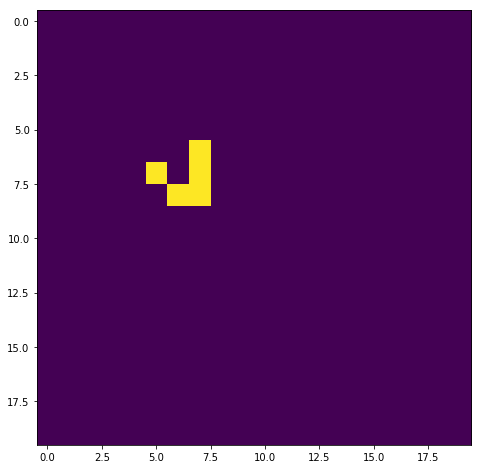

In [3]:
gol = GameOfLife()
gol.gen_Glider()
out_ani= gol.run(no_of_frames=10, frame_interval=100, color_map='viridis') 
HTML(out_ani.to_jshtml()) # To do animation inline in juptyer notebook
out_ani.save('Glider.gif', writer='imagemagick') # To save animation as a gif

Starting Game of Life with Osillator Pulsar....
--------------------------------------------------


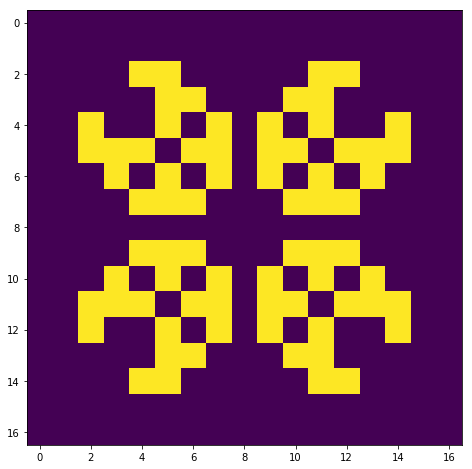

In [4]:
gol.gen_Pulsar()
out_ani= gol.run(no_of_frames=10, frame_interval=100, color_map='viridis') 
HTML(out_ani.to_jshtml()) # To do animation inline in juptyer notebook
out_ani.save('Pulsar.gif', writer='imagemagick') # To save animation as a gif

Starting Game of Life with Beacon Configuration....
--------------------------------------------------


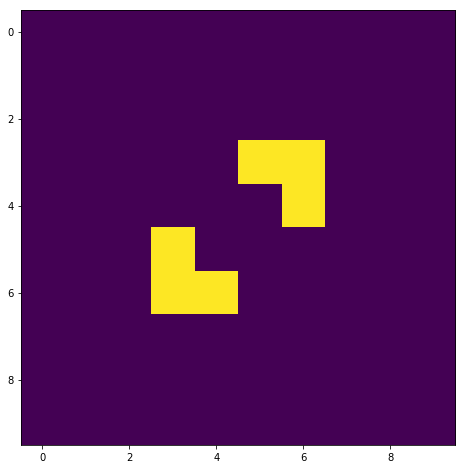

In [5]:
gol.gen_Beacon()
out_ani= gol.run(no_of_frames=10, frame_interval=100, color_map='viridis') 
HTML(out_ani.to_jshtml()) # To do animation inline in juptyer notebook
out_ani.save('Beacon.gif', writer='imagemagick') # To save animation as a gif

Starting Game of Life with Gosper Glider Gun....
--------------------------------------------------


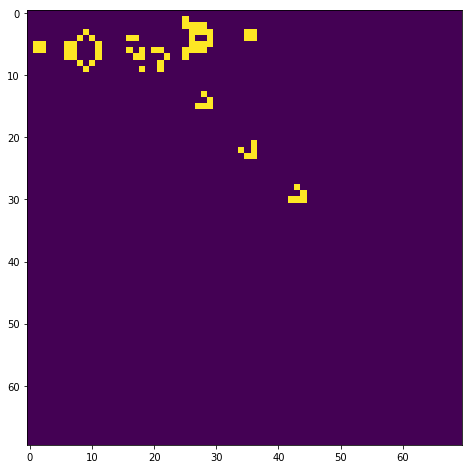

In [6]:
gol.gen_GosperGliderGun()
out_ani= gol.run(no_of_frames=50, frame_interval=100, color_map='viridis') 
HTML(out_ani.to_jshtml()) # To do animation inline in juptyer notebook
out_ani.save('Gun.gif', writer='imagemagick') # To save animation as a gif

Starting Game of Life with Block Switch Engine Configuration....
--------------------------------------------------


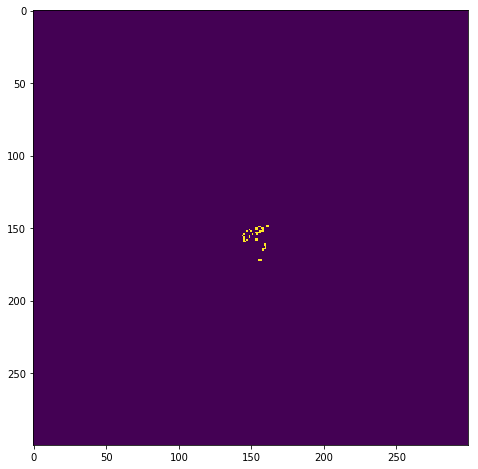

In [7]:
gol.gen_BlockSwitchEngine()
out_ani= gol.run(no_of_frames=100, frame_interval=100, color_map='viridis') 
HTML(out_ani.to_jshtml()) # To do animation inline in juptyer notebook
out_ani.save('Bse.gif', writer='imagemagick') # To save animation as a gif

Starting Game of Life with R-Pentomino Configuration....
--------------------------------------------------


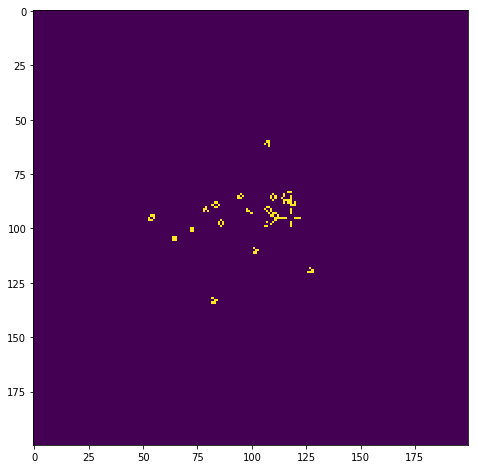

In [8]:
gol.gen_r_pentomino()
out_ani= gol.run(no_of_frames=100, frame_interval=100, color_map='viridis') 
HTML(out_ani.to_jshtml()) # To do animation inline in juptyer notebook
out_ani.save('R.gif', writer='imagemagick') # To save animation as a gif